# General Setup Code

import threading
import requests
import pandas as pd
import csv
import time
from datetime import datetime
import json
import ast
import matplotlib.pyplot as plt
import threading
from queue import Queue
import numpy as np

# Data Collection Through Surveying Blacklight

In [44]:
gov_domain_list = ['ncbi.nlm.nih.gov', 'cdc.gov', 'nasa.gov', 'fda.gov', 'whitehouse.gov', 'ftc.gov', 'loc.gov', 'www1.nyc.gov', 'census.gov', 'epa.gov', 'irs.gov', 'privacyshield.gov', 'pubmed.ncbi.nlm.nih.gov', 'ncsc.gov.uk', 'hhs.gov', 'fcc.gov', 'justice.gov', 'sec.gov', 'usajobs.gov', 'cdtfa.ca.gov', 'nps.gov', 'state.gov', 'fbi.gov', 'bls.gov', 'congress.gov', 'csrc.nist.gov', 'consumer.ftc.gov', 'sba.gov', 'dol.gov', 'king.senate.gov', 'usa.gov', 'memphistn.gov', 'nlm.nih.gov', 'metoffice.gov.uk', 'nist.gov', 'copyright.gov', 'usgs.gov', 'south-ayrshire.gov.uk', 'gallery.usgs.gov', 'eia.gov', 'jpl.nasa.gov', 'agri.ohio.gov', 'federalregister.gov', 'ecfr.gov', 'mi.gov', 'nvd.nist.gov', 'nih.gov', 'treasury.gov', 'fema.gov', 'michigan.gov', 'oregon.gov', 'mass.gov', 'energy.gov', 'minesec.gov.cm', 'nyc.gov', 'usda.gov', 'dhs.gov', 'cmsapucaiadosul.rs.gov.br', 'federalreserve.gov', 'leginfo.legislature.ca.gov', 'in.gov', 'legislation.gov.uk', 'ssa.gov', 'clinicaltrials.gov', 'assets.publishing.service.gov.uk', 'beian.miit.gov.cn', 'gpo.gov', 'health.gov.au', 'uspto.gov', 'nsf.gov', 'nces.ed.gov', 'fs.usda.gov', 'weather.gov', 'uscis.gov', 'ons.gov.uk', 'va.gov', 'archives.gov', 'healthcare.gov', 'mn.gov', 'portal.ct.gov', 'home.treasury.gov', 'senate.gov', 'gsa.gov', 'www2.ed.gov', 'faa.gov', 'supremecourt.gov', 'ic3.gov', 'accessdata.fda.gov', 'fdic.gov', 'science.nasa.gov', 'tn.gov', 'travel.state.gov', 'fec.gov', 'nga.gov', 'cisa.gov', 'consumerfinance.gov', 'house.gov', 'energystar.gov', 'nationalarchives.gov.uk', 'osha.gov', 'cdc.gov.tw', 'seattle.gov', 'colorado.gov', 'govinfo.gov', 'mars.nasa.gov', 'cancer.gov', 'www2.gov.bc.ca', 'oag.ca.gov', 'doh.wa.gov', 'nrel.gov', 'neh.gov', 'medicare.gov', 'maine.gov', 'austintexas.gov', 'commerce.gov', 'fhwa.dot.gov', 'defense.gov', 'noaa.gov', 'gao.gov', 'cia.gov', 'azdhs.gov', 'tfl.gov.uk', 'solarsystem.nasa.gov', 'obamawhitehouse.archives.gov', 'ngdc.noaa.gov', 'medlineplus.gov', 'nvlpubs.nist.gov', 'cpsc.gov', 'ustr.gov', 'tsa.gov', 'cdph.ca.gov', 'sos.ca.gov', 'salute.gov.it', 'cbp.gov', 'nimh.nih.gov', 'patft.uspto.gov', 'nhlbi.nih.gov', 'earthobservatory.nasa.gov', 'ed.gov', 'pubchem.ncbi.nlm.nih.gov', 'nhc.noaa.gov', 'ams.usda.gov', 'uscode.house.gov', 'kingcounty.gov', 'nrcs.usda.gov', 'nccih.nih.gov', 'pubs.usgs.gov', 'cms.gov', 'transportation.gov', 'dni.gov', 'nj.gov', 'wwwnc.cdc.gov', 'bank.gov.ua', 'hud.gov', 'ct.gov', 'samhsa.gov', 'boston.gov', 'ada.gov', 'hse.gov.uk', 'regulations.gov', 'ldh.la.gov', 'nhtsa.gov', 'health.govt.nz', 'us-cert.gov', 'moh.gov.sg', 'eric.ed.gov', 'transition.fcc.gov', 'abs.gov.au', 'fsis.usda.gov', 'chp.gov.hk', 'uscourts.gov', 'media.defense.gov', 'houstontx.gov', 'climate.nasa.gov', 'earthquake.usgs.gov', 'bis.doc.gov', 'www2.census.gov', 'ers.usda.gov', 'grants.gov', 'osti.gov', 'hhs.texas.gov', 'qld.gov.au', 'nparks.gov.sg', 'covid19.nj.gov', 'blm.gov', 'nei.nih.gov', 'docs.house.gov', 'vdh.virginia.gov', 'export.gov', 'sandiego.gov', 'nysenate.gov', 'bcb.gov.br', 'usaid.gov', 'airnow.gov', 'ato.gov.au', 'health.nsw.gov.au', 'miamidade.gov', 'ncdc.noaa.gov', 'bea.gov', 'alabamapublichealth.gov', 'bom.gov.au', 'dshs.texas.gov', 'ehp.niehs.nih.gov', 'eeoc.gov', 'detroitmi.gov', 'data.bls.gov', 'nrc.gov', 'fws.gov', 'environment.gov.au', 'dhs.wisconsin.gov', 'doh.gov.ph', 'covid19.colorado.gov', 'dec.ny.gov', 'esrl.noaa.gov', 'fns.usda.gov', 'wsdot.wa.gov', 'ahrq.gov', 'nia.nih.gov', 'ncei.noaa.gov', 'apps.irs.gov', 'ntrs.nasa.gov', 'mohfw.gov.in', 'coronavirus.health.ny.gov', 'blogs.loc.gov', 'doi.gov', 'covid.cdc.gov', 'usability.gov', 'portlandoregon.gov', 'nsa.gov', 'pmindia.gov.in', 'ibge.gov.br', 'ok.gov', 'lbl.gov', 'ready.gov', 'cityofboston.gov', 'legislation.gov.au', 'health.pa.gov', 'genome.gov', 'grants.nih.gov', 'niehs.nih.gov', 'schools.nyc.gov', 'history.house.gov', 'nass.usda.gov', 'dnr.wi.gov', 'afdc.energy.gov', 'ntia.doc.gov', 'ninds.nih.gov', 'montgomerycountymd.gov', 'pib.gov.in', 'files.eric.ed.gov', 'business.ftc.gov', 'planalto.gov.br', 'ncjrs.gov', 'bouldercolorado.gov', 'data.gov', 'nifc.gov', 'environment.nsw.gov.au', 'apod.nasa.gov', 'www2.illinois.gov', 'vault.fbi.gov', 'trade.gov', 'aspe.hhs.gov', 'fairfaxcounty.gov', 'www3.epa.gov', 'fmprc.gov.cn', 'thomas.loc.gov', 'aph.gov.au', 'arts.gov', 'niaid.nih.gov', 'publication.pravo.gov.ru', 'phila.gov', 'opm.gov', 'health.ny.gov', 'crsreports.congress.gov', 'judiciary.gov.uk', 'gov.ca.gov', 'dfat.gov.au', 'donotcall.gov', 'memory.loc.gov', 'studentaid.gov', 'sandiegocounty.gov', 'dmv.ca.gov', 'ptsd.va.gov', 'cbo.gov', 'london.gov.uk', 'markey.senate.gov', 'trove.nla.gov.au', 'honolulu.gov', 'itl.nist.gov', 'governor.ny.gov', 'petitions.whitehouse.gov', 'health.gov', 'food.gov.uk', 'healthdirect.gov.au', 'cityofsydney.nsw.gov.au', 'bjs.gov', 'aphis.usda.gov', 'webarchive.nationalarchives.gov.uk', 'drugabuse.gov', 'pinalcountyaz.gov', 'ice.gov', 'dea.gov', 'tepapa.govt.nz', 'homeaffairs.gov.au', 'ga.gov.au', 'atsdr.cdc.gov', 'nssdc.gsfc.nasa.gov', 'phmsa.dot.gov', 'legislature.mi.gov', 'fsa.usda.gov', 'nws.noaa.gov', 'cfpub.epa.gov', 'atf.gov', 'data.census.gov', 'doc.govt.nz', 'hko.gov.hk', 'tpwd.texas.gov', 'msdh.ms.gov', 'ntsb.gov', 'panynj.gov', 'yosemite.epa.gov', 'cde.ca.gov', 'prefeitura.sp.gov.br', 'accc.gov.au', 'childwelfare.gov', 'ornl.gov', 'water.usgs.gov', 'data.gov.uk', 'us-cert.cisa.gov', 'content.govdelivery.com', 'cftc.gov', 'ferc.gov', 'police.gov.hk', 'beta.companieshouse.gov.uk', 'collegescorecard.ed.gov', 'minneapolismn.gov', 'catalog.data.gov', 'app.leg.wa.gov', 'profiles.nlm.nih.gov', 'swpc.noaa.gov', 'phoenix.gov', 'fmcsa.dot.gov', 'fueleconomy.gov', 'acf.hhs.gov', 'commerce.senate.gov', 'history.state.gov', 'commerce.alaska.gov', 'svs.gsfc.nasa.gov', 'covid19vaccine.health.ny.gov', 'fdc.nal.usda.gov', 'nidirect.gov.uk', 'transtats.bts.gov', 'photojournal.jpl.nasa.gov', 'nh.gov', 'wonder.cdc.gov', 'president.gov.ua', 'forecast.weather.gov', 'georgia.gov', 'find-and-update.company-information.service.gov.uk', 'floridahealth.gov', 'azleg.gov', 'ico.gov.uk', 'parks.ca.gov', 'nesdis.noaa.gov', 'maryland.gov', 'covid19.ca.gov', 'niddk.nih.gov', 'nea.gov.sg', 'usbr.gov', 'ilga.gov', 'npc.gov.cn', 'dfs.ny.gov', 'deadiversion.usdoj.gov', 'augustaga.gov', 'history.nasa.gov', 'fire.ca.gov']

In [147]:
# Read the data from CSV
with open('end_gov_names.txt', 'r') as f:
    reader = csv.reader(f)
    gov_domain_list = next(reader)

In [148]:

# gov_domain_list = gov_domain_list[18000:]
print(len(gov_domain_list))

16990


In [149]:


def process_range(start, stop, shared_dict):
    api_url = "https://blacklight.api.themarkup.org/"
    i = start

    for url in gov_domain_list[start:stop]:
        i += 1
        if (i % 10 == 0):
            print(str(i) + " " + str(datetime.now()))
        todo = {"inUrl": "http://" + url}
        response = requests.post(api_url, json=todo)
        if (int(response.status_code) != 200):
            continue
        data = response.json()
        shared_dict[url] = data  # Store the data in the shared dictionary with the URL as the key

# Define the number of threads to use
nthreads = 4

# Divide the input range into nthreads subranges
subranges = [(i, i + len(gov_domain_list)//nthreads) for i in range(0, len(gov_domain_list), len(gov_domain_list)//nthreads)]

# Create a shared dictionary to store the intermediate data
shared_dict = {}

# Create a list of threads and start them
threads = []
for start, stop in subranges:
    t = threading.Thread(target=process_range, args=(start, stop, shared_dict))
    t.start()
    threads.append(t)

# Wait for all threads to finish
for t in threads:
    t.join()

# Convert the shared dictionary to a dataframe
df = pd.concat([pd.json_normalize(data) for data in shared_dict.values()], ignore_index=True)

# Save the dataframe to a CSV file
filename = 'next' + str(len(gov_domain_list)) + 'bymultithread.csv'
df.to_csv(filename)

16990 2023-04-13 23:51:41.767185
4250 2023-04-13 23:51:41.952952
8500 2023-04-13 23:51:47.606312
10 2023-04-13 23:51:48.610871
8510 2023-04-13 23:51:53.486179
4260 2023-04-13 23:52:19.362879
20 2023-04-13 23:52:26.189859
12750 2023-04-13 23:52:36.698085
30 2023-04-13 23:53:01.726381
4270 2023-04-13 23:53:25.044691
40 2023-04-13 23:53:38.485597
12760 2023-04-13 23:53:40.987310
50 2023-04-13 23:54:15.771526
12770 2023-04-13 23:54:25.533549
12780 2023-04-13 23:54:39.323684
60 2023-04-13 23:54:51.767902
8520 2023-04-13 23:54:59.483366
4280 2023-04-13 23:55:01.654030
4290 2023-04-13 23:55:07.074362
4300 2023-04-13 23:55:13.112641
12790 2023-04-13 23:55:16.506656
12800 2023-04-13 23:55:22.001763
70 2023-04-13 23:55:27.477782
12810 2023-04-13 23:55:27.664381
80 2023-04-13 23:55:35.922186
90 2023-04-13 23:55:42.095745
100 2023-04-13 23:55:47.493511
12820 2023-04-13 23:56:03.322250
8530 2023-04-13 23:56:05.545586
4310 2023-04-13 23:56:17.712769
12830 2023-04-13 23:56:40.562976
8540 2023-04-13 2

13400 2023-04-14 01:00:23.094528
4880 2023-04-14 01:00:26.596404
760 2023-04-14 01:01:29.968486
9030 2023-04-14 01:02:03.879226
13410 2023-04-14 01:02:17.597187
770 2023-04-14 01:02:29.578825
4890 2023-04-14 01:03:02.523410
13420 2023-04-14 01:03:52.671048
780 2023-04-14 01:04:16.588427
9040 2023-04-14 01:04:57.754243
13430 2023-04-14 01:05:42.810472
9050 2023-04-14 01:05:42.832433
4900 2023-04-14 01:06:20.083854
790 2023-04-14 01:06:29.068081
9060 2023-04-14 01:06:37.707102
9070 2023-04-14 01:07:10.671018
13440 2023-04-14 01:07:41.291078
800 2023-04-14 01:07:47.538248
4910 2023-04-14 01:08:34.448985
13450 2023-04-14 01:08:45.738878
810 2023-04-14 01:09:01.322132
9080 2023-04-14 01:09:56.431112
4920 2023-04-14 01:10:06.907087
13460 2023-04-14 01:10:22.403482
820 2023-04-14 01:10:33.839379
4930 2023-04-14 01:11:16.950209
9090 2023-04-14 01:11:44.186344
830 2023-04-14 01:12:45.206445
4940 2023-04-14 01:13:05.189721
13470 2023-04-14 01:13:55.469541
9100 2023-04-14 01:14:18.816071
840 2023

1380 2023-04-14 02:48:53.089431
14070 2023-04-14 02:49:11.354235
5490 2023-04-14 02:49:33.165673
9680 2023-04-14 02:50:05.458514
1390 2023-04-14 02:50:07.897650
5500 2023-04-14 02:50:18.457155
5510 2023-04-14 02:50:32.968405
14080 2023-04-14 02:50:45.872529
1400 2023-04-14 02:51:08.609512
9690 2023-04-14 02:51:38.008755
5520 2023-04-14 02:51:39.842202
14090 2023-04-14 02:51:43.025673
1410 2023-04-14 02:52:23.254337
9700 2023-04-14 02:53:23.261645
5530 2023-04-14 02:53:28.340450
14100 2023-04-14 02:53:40.193211
1420 2023-04-14 02:54:11.520499
14110 2023-04-14 02:55:00.645327
9710 2023-04-14 02:55:29.874349
1430 2023-04-14 02:56:15.809594
14120 2023-04-14 02:56:47.294044
5540 2023-04-14 02:56:53.595192
9720 2023-04-14 02:56:55.378700
9730 2023-04-14 02:58:09.269376
1440 2023-04-14 02:58:15.209442
5550 2023-04-14 02:58:35.074956
14130 2023-04-14 02:58:38.043661
9740 2023-04-14 02:59:08.968992
5560 2023-04-14 02:59:28.119201
1450 2023-04-14 02:59:58.838554
14140 2023-04-14 03:00:00.680011


2040 2023-04-14 04:35:22.585043
6100 2023-04-14 04:35:38.151755
14710 2023-04-14 04:36:16.755722
2050 2023-04-14 04:36:48.293709
6110 2023-04-14 04:36:49.602788
14720 2023-04-14 04:37:46.765233
6120 2023-04-14 04:38:22.812402
2060 2023-04-14 04:38:38.797289
10310 2023-04-14 04:38:55.988667
6130 2023-04-14 04:39:00.406274
14730 2023-04-14 04:39:27.426287
10320 2023-04-14 04:39:59.772995
2070 2023-04-14 04:40:28.553281
6140 2023-04-14 04:40:28.794374
14740 2023-04-14 04:41:00.861013
6150 2023-04-14 04:41:35.753699
2080 2023-04-14 04:41:49.259372
10330 2023-04-14 04:42:09.193630
6160 2023-04-14 04:42:50.463230
14750 2023-04-14 04:43:18.635038
2090 2023-04-14 04:43:57.818286
6170 2023-04-14 04:44:16.184226
14760 2023-04-14 04:44:30.563588
10340 2023-04-14 04:44:42.809751
14770 2023-04-14 04:45:29.403515
6180 2023-04-14 04:45:34.725525
14780 2023-04-14 04:46:20.983441
6190 2023-04-14 04:46:48.046222
2100 2023-04-14 04:47:17.025036
10350 2023-04-14 04:47:31.564935
6200 2023-04-14 04:47:33.81

10900 2023-04-14 06:13:57.968237
2610 2023-04-14 06:15:02.750084
15410 2023-04-14 06:15:11.558934
6770 2023-04-14 06:15:14.319034
10910 2023-04-14 06:15:21.459284
10920 2023-04-14 06:16:05.353670
15420 2023-04-14 06:16:07.370657
2620 2023-04-14 06:16:36.691182
6780 2023-04-14 06:16:42.588384
15430 2023-04-14 06:17:12.822326
2630 2023-04-14 06:17:21.504515
6790 2023-04-14 06:18:03.791657
15440 2023-04-14 06:18:19.669581
10930 2023-04-14 06:18:21.098551
2640 2023-04-14 06:18:22.230014
15450 2023-04-14 06:19:37.493762
2650 2023-04-14 06:19:43.128597
6800 2023-04-14 06:20:07.598073
10940 2023-04-14 06:20:52.762439
15460 2023-04-14 06:21:00.339759
2660 2023-04-14 06:21:02.592677
6810 2023-04-14 06:21:20.491226
15470 2023-04-14 06:22:04.646531
10950 2023-04-14 06:22:29.632652
10960 2023-04-14 06:22:44.614095
2670 2023-04-14 06:22:47.041332
15480 2023-04-14 06:23:14.690276
6820 2023-04-14 06:23:46.539072
2680 2023-04-14 06:23:53.815342
2690 2023-04-14 06:24:17.669377
10970 2023-04-14 06:24:37

3210 2023-04-14 07:49:13.730309
11530 2023-04-14 07:49:33.808174
16070 2023-04-14 07:49:53.565658
7400 2023-04-14 07:50:01.663248
3220 2023-04-14 07:50:30.230651
16080 2023-04-14 07:50:36.782130
7410 2023-04-14 07:50:40.878444
3230 2023-04-14 07:51:01.672352
7420 2023-04-14 07:51:27.021632
16090 2023-04-14 07:51:48.573047
11540 2023-04-14 07:51:50.731753
7430 2023-04-14 07:52:22.852237
3240 2023-04-14 07:52:25.941243
3250 2023-04-14 07:53:36.802139
16100 2023-04-14 07:53:37.314274
11550 2023-04-14 07:53:49.502178
7440 2023-04-14 07:53:57.097092
3260 2023-04-14 07:54:23.070024
7450 2023-04-14 07:54:43.327860
11560 2023-04-14 07:55:09.210586
7460 2023-04-14 07:55:41.257562
3270 2023-04-14 07:56:10.892495
16110 2023-04-14 07:56:24.152533
11570 2023-04-14 07:56:48.681190
7470 2023-04-14 07:57:34.786638
16120 2023-04-14 07:57:37.754693
3280 2023-04-14 07:57:41.441867
11580 2023-04-14 07:58:00.513922
3290 2023-04-14 07:58:36.535837
7480 2023-04-14 07:58:41.551671
11590 2023-04-14 07:59:17.39

16750 2023-04-14 09:19:56.472193
3850 2023-04-14 09:20:15.004270
3860 2023-04-14 09:20:23.606652
3870 2023-04-14 09:20:31.696320
3880 2023-04-14 09:20:39.991271
8010 2023-04-14 09:21:07.950146
12130 2023-04-14 09:21:09.175802
3890 2023-04-14 09:21:50.196200
16760 2023-04-14 09:21:59.328951
8020 2023-04-14 09:22:25.466338
3900 2023-04-14 09:23:02.640633
16770 2023-04-14 09:23:19.022407
12140 2023-04-14 09:23:42.882549
8030 2023-04-14 09:23:54.557384
3910 2023-04-14 09:23:57.423360
16780 2023-04-14 09:24:06.801794
12150 2023-04-14 09:24:58.661600
8040 2023-04-14 09:25:03.885189
3920 2023-04-14 09:25:40.070867
8050 2023-04-14 09:26:02.350901
16790 2023-04-14 09:26:45.358720
12160 2023-04-14 09:26:48.868338
3930 2023-04-14 09:26:53.665922
3940 2023-04-14 09:28:02.886014
16800 2023-04-14 09:28:05.137183
8060 2023-04-14 09:28:24.080984
12170 2023-04-14 09:28:28.482188
16810 2023-04-14 09:29:34.739962
12180 2023-04-14 09:29:36.175035
8070 2023-04-14 09:29:36.393892
3950 2023-04-14 09:30:20.61

In [6]:
df1 = pd.read_csv("first20000SUCCESSbymultithread.csv", low_memory = False)
df1 = df1[(df1['status']=="success")]
df2 = pd.read_csv("next16990bymultithread.csv", low_memory = False)
df2 = df2[(df2['status']=="success")]



In [7]:
display(df1)

,Unnamed: 0,status,title,uri_ins,uri_dest,uri_redirects,host,start_time,end_time,browsing_history,...,hosts.requests.third_party,s3.archive,s3.report,s3.screenshots,error_message,nicer_error_message,inUrl,inProgressStartTime,page_response.name,page_response
0,0,success,Blacklight - API Request,http://app.ntsb.gov,https://www.ntsb.gov/Pages/home.aspx,"['http://app.ntsb.gov/', 'https://www.ntsb.gov/']",app.ntsb.gov,2023-04-12T21:58:07.095Z,2023-04-12T21:58:16.663Z,"['https://www.ntsb.gov/Pages/home.aspx', 'http...",...,"['kit.fontawesome.com', 'ka-p.fontawesome.com'...",https://mrkp-static-production.themarkup.org/b...,https://mrkp-static-production.themarkup.org/b...,['https://mrkp-static-production.themarkup.org...,NaN,NaN,NaN,NaN,NaN,NaN
1,1,success,Blacklight - API Request,http://ncbi.nlm.nih.gov,https://www.ncbi.nlm.nih.gov/,['http://ncbi.nlm.nih.gov/'],ncbi.nlm.nih.gov,2023-04-12T21:12:56.422Z,2023-04-12T21:13:07.510Z,"['https://www.ncbi.nlm.nih.gov/', 'https://www...",...,"['script.crazyegg.com', 'www.google-analytics....",https://mrkp-static-production.themarkup.org/b...,https://mrkp-static-production.themarkup.org/b...,['https://mrkp-static-production.themarkup.org...,NaN,NaN,NaN,NaN,NaN,NaN
2,2,success,Blacklight - API Request,http://houserepublicans.wa.gov,https://houserepublicans.wa.gov/,['http://houserepublicans.wa.gov/'],houserepublicans.wa.gov,2023-04-12T21:58:17.892Z,2023-04-12T21:58:28.937Z,"['https://houserepublicans.wa.gov/', 'https://...",...,"['fonts.googleapis.com', 'maps.googleapis.com'...",https://mrkp-static-production.themarkup.org/b...,https://mrkp-static-production.themarkup.org/b...,['https://mrkp-static-production.themarkup.org...,NaN,NaN,NaN,NaN,NaN,NaN
4,4,success,Blacklight - API Request,http://shop.nga.gov,https://shop.nga.gov/,['http://shop.nga.gov/'],shop.nga.gov,2023-04-12T21:58:07.092Z,2023-04-12T21:58:37.462Z,"['https://shop.nga.gov/', 'https://shop.nga.go...",...,"['maxcdn.bootstrapcdn.com', 'static.klaviyo.co...",https://mrkp-static-production.themarkup.org/b...,https://mrkp-static-production.themarkup.org/b...,['https://mrkp-static-production.themarkup.org...,NaN,NaN,NaN,NaN,NaN,NaN
5,5,success,Blacklight - API Request,http://stp.gsfc.nasa.gov,https://stp.gsfc.nasa.gov/,['http://stp.gsfc.nasa.gov/'],stp.gsfc.nasa.gov,2023-04-12T21:58:39.088Z,2023-04-12T21:58:48.517Z,"['https://stp.gsfc.nasa.gov/', 'https://stp.gs...",...,"['dap.digitalgov.gov', 'www.google-analytics.c...",https://mrkp-static-production.themarkup.org/b...,https://mrkp-static-production.themarkup.org/b...,['https://mrkp-static-production.themarkup.org...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17863,17863,success,Blacklight - API Request,http://vehiclehistory.gov,https://vehiclehistory.bja.ojp.gov/,"['http://vehiclehistory.gov/', 'https://vehicl...",vehiclehistory.gov,2023-04-13T17:50:57.447Z,2023-04-13T17:51:06.175Z,"['https://vehiclehistory.bja.ojp.gov/', 'https...",...,"['cse.google.com', 'www.google.com', 'www.goog...",https://mrkp-static-production.themarkup.org/b...,https://mrkp-static-production.themarkup.org/b...,['https://mrkp-static-production.themarkup.org...,NaN,NaN,NaN,NaN,NaN,NaN
17866,17866,success,Blacklight - API Request,http://rosebudsiouxtribe-nsn.gov,https://www.rosebudsiouxtribe-nsn.gov/,['http://rosebudsiouxtribe-nsn.gov/'],rosebudsiouxtribe-nsn.gov,2023-04-13T17:51:08.585Z,2023-04-13T17:51:22.025Z,"['https://www.rosebudsiouxtribe-nsn.gov/', 'ht...",...,"['frog.wix.com', 'static.parastorage.com', 'si...",https://mrkp-static-production.themarkup.org/b...,https://mrkp-static-production.themarkup.org/b...,['https://mrkp-static-production.themarkup.org...,NaN,NaN,NaN,NaN,NaN,NaN
17867,17867,success,Blacklight - API Request,http://oa.mo.gov,https://oa.mo.gov/,['http://oa.mo.gov/'],oa.mo.gov,2023-04-13T17:51:12.919Z,2023-04-13T17:51:19.257Z,"['https://oa.mo.gov/', 'https://oa.mo.gov/info...",...,"['fonts.googleapis.com', 'www.google-ana

In [8]:
display(df2)

,Unnamed: 0,status,title,uri_ins,uri_dest,uri_redirects,host,start_time,end_time,browsing_history,...,deviceEmulated.viewport.isLandscape,hosts.requests.first_party,hosts.requests.third_party,s3.archive,s3.report,s3.screenshots,error_message,nicer_error_message,page_response.name,page_response
0,0,success,Blacklight - API Request,http://yukonok.gov,https://www.yukonok.gov/,['http://yukonok.gov/'],yukonok.gov,2023-04-13T02:44:21.852Z,2023-04-13T02:44:37.837Z,"['https://www.yukonok.gov/', 'https://www.yuko...",...,False,"['yukonok.gov', 'www.yukonok.gov']","['code.jquery.com', 'www.googletagmanager.com'...",https://mrkp-static-production.themarkup.org/b...,https://mrkp-static-production.themarkup.org/b...,['https://mrkp-static-production.themarkup.org...,NaN,NaN,NaN,NaN
1,1,success,Blacklight - API Request,http://dodgecounty.nebraska.gov,https://dodgecounty.nebraska.gov/,['http://dodgecounty.nebraska.gov/'],dodgecounty.nebraska.gov,2023-04-13T02:44:19.653Z,2023-04-13T02:44:25.329Z,"['https://dodgecounty.nebraska.gov/', 'https:/...",...,False,['dodgecounty.nebraska.gov'],"['fonts.googleapis.com', 'translate.google.com...",https://mrkp-static-production.themarkup.org/b...,https://mrkp-static-production.themarkup.org/b...,['https://mrkp-static-production.themarkup.org...,NaN,NaN,NaN,NaN
2,2,success,Blacklight - API Request,http://stmarysga.gov,http://stmarysga.gov/,[],stmarysga.gov,2023-04-13T02:44:39.129Z,2023-04-13T02:44:47.409Z,"['http://stmarysga.gov/', 'http://stmarysga.go...",...,False,['stmarysga.gov'],"['fonts.googleapis.com', 'ajax.googleapis.com'...",https://mrkp-static-production.themarkup.org/b...,https://mrkp-static-production.themarkup.org/b...,['https://mrkp-static-production.themarkup.org...,NaN,NaN,NaN,NaN
3,3,success,Blacklight - API Request,http://vtranscontracts.vermont.gov,https://vtrans.vermont.gov/contract-admin,"['http://vtranscontracts.vermont.gov/', 'http:...",vtranscontracts.vermont.gov,2023-04-13T02:44:26.121Z,2023-04-13T02:44:38.797Z,"['https://vtrans.vermont.gov/contract-admin', ...",...,False,"['vtranscontracts.vermont.gov', 'vtrans.vermon...","['www.googletagmanager.com', 'use.fontawesome....",https://mrkp-static-production.themarkup.org/b...,https://mrkp-static-production.themarkup.org/b...,['https://mrkp-static-production.themarkup.org...,NaN,NaN,NaN,NaN
4,4,success,Blacklight - API Request,http://northsiouxcity-sd.gov,https://northsiouxcity-sd.gov/,['http://northsiouxcity-sd.gov/'],northsiouxcity-sd.gov,2023-04-13T02:44:48.396Z,2023-04-13T02:44:52.539Z,"['https://northsiouxcity-sd.gov/', 'https://no...",...,False,['northsiouxcity-sd.gov'],"['fonts.gstatic.com', 'cdn.jsdelivr.net', 'www...",https://mrkp-static-production.themarkup.org/b...,https://mrkp-static-production.themarkup.org/b...,['https://mrkp-static-production.themarkup.org...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16893,16893,success,Blacklight - API Request,http://gis.berkeleycountysc.gov,https://gis.berkeleycountysc.gov/,['http://gis.berkeleycountysc.gov/'],gis.berkeleycountysc.gov,2023-04-14T15:59:09.598Z,2023-04-14T15:59:14.254Z,"['https://gis.berkeleycountysc.gov/', 'https:/...",...,False,['gis.berkeleycountysc.gov'],"['www.googletagmanager.com', 'www.google-analy...",https://mrkp-static-production.themarkup.org/b...,https://mrkp-static-production.themarkup.org/b...,['https://mrkp-static-production.themarkup.org...,NaN,NaN,NaN,NaN
16894,16894,success,Blacklight - API Request,http://visionzero.ddot.dc.gov,http://visionzero.ddot.dc.gov/,[],visionzero.ddot.dc.gov,2023-04-14T15:59:15.237Z,2023-04-14T15:59:16.355Z,['http://visionzero.ddot.dc.gov/'],...,False,['visionzero.ddot.dc.gov'],[],https://mrkp-static-production.themarkup.org/b...,https://mrkp-static-production.themarkup.org/b...,['https://mrkp-static-production.themarkup.org...,NaN,NaN,NaN,NaN
16895,16895,success,Blacklight - API Request,http://alligatorriver.fws.gov,https://www.fws.gov/refuge/alligator-river,"['htt

In [9]:
frames = [df1, df2]
result = pd.concat(frames)

In [18]:
result.to_csv("results_vF.csv")

# Extract Data From Files (reccomended)

In [ ]:
thing = pd.read_csv("groupsexpanded_vF.csv", low_memory = False)

### Extraneous Work (expanding the groups out), use if running the code above

In [5]:
result = pd.read_csv("results_vF.csv", low_memory = False)

In [6]:
f"{result.uri_ins.nunique()} of sites I was able to succesfully collect information from"

'21241 of sites I was able to succesfully collect information from'

In [19]:
data = result.groups.iloc[0]
# print(data)
# Use ast.literal_eval() to safely convert the string into a list of dictionaries
data_list = ast.literal_eval(data)

# Print the resulting list of dictionaries
thing = pd.DataFrame(data_list[0]["cards"])
thing['url'] = result.uri_ins.iloc[0]

    
for i in range(1,len(result)):
    data = result.groups.iloc[i]
    data_list = ast.literal_eval(data)
    thing2 = pd.DataFrame(data_list[0]["cards"])
    thing2['url'] = result.uri_ins.iloc[i]
#     print(thing2['url'])
    #     display(thing2)
    thing = pd.concat([thing, thing2], axis = 0, ignore_index=True)
    
cookies_df = thing.loc[thing['cardType'] == "cookies"]



KeyboardInterrupt: 

In [175]:
# display(cookies_df.loc[cookies_df['expandableList'] != ])
display(cookies_df)

,cardType,bigNumber,title,testEventsFound,body,expandableList,onAvgStatement,surveyLink,methodology,caveat,dataUrlForImage,domainData,url
1,cookies,0.0,Third-party cookies not found.,False,[These are commonly used by advertising tracki...,NaN,This is <strong>less than half</strong> the av...,https://themarkup.org/blacklight/2020/09/22/ho...,https://themarkup.org/blacklight/2020/09/22/ho...,NaN,NaN,NaN,http://app.ntsb.gov
8,cookies,0.0,Third-party cookies not found.,False,[These are commonly used by advertising tracki...,NaN,This is <strong>less than half</strong> the av...,https://themarkup.org/blacklight/2020/09/22/ho...,https://themarkup.org/blacklight/2020/09/22/ho...,NaN,NaN,NaN,http://ncbi.nlm.nih.gov
15,cookies,0.0,Third-party cookies not found.,False,[These are commonly used by advertising tracki...,NaN,This is <strong>less than half</strong> the av...,https://themarkup.org/blacklight/2020/09/22/ho...,https://themarkup.org/blacklight/2020/09/22/ho...,NaN,NaN,NaN,http://houserepublicans.wa.gov
22,cookies,1.0,Third-party cookie found.,True,[These are commonly used by advertising tracki...,NaN,This is <strong>less than half</strong> the av...,https://themarkup.org/blacklight/2020/09/22/ho...,https://themarkup.org/blacklight/2020/09/22/ho...,NaN,NaN,NaN,http://shop.nga.gov
29,cookies,2.0,Third-party cookies were found.,True,[These are commonly used by advertising tracki...,NaN,This is <strong>less than</strong> the average...,https://themarkup.org/blacklight/2020/09/22/ho...,https://themarkup.org/blacklight/2020/09/22/ho...,NaN,NaN,NaN,http://stp.gsfc.nasa.gov
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148653,cookies,0.0,Third-party cookies not found.,False,[These are commonly used by advertising tracki...,NaN,This is <strong>less than half</strong> the av...,https://themarkup.org/blacklight/2020/09/22/ho...,https://themarkup.org/blacklight/2020/09/22/ho...,NaN,NaN,NaN,http://gis.berkeleycountysc.gov
148660,cookies,0.0,Third-party cookies not found.,False,[These are commonly used by advertising tracki...,NaN,This is <strong>less than half</strong> the av...,https://themarkup.org/blacklight/2020/09/22/ho...,https://themarkup.org/blacklight/2020/09/22/ho...,NaN,NaN,NaN,http://visionzero.ddot.dc.gov
148667,cookies,0.0,Third-party cookies not found.,False,[These are commonly used by advertising tracki...,NaN,This is <strong>less than half</strong> the av...,https://themarkup.org/blacklight/2020/09/22/ho...,https://themarkup.org/blacklight/2020/09/22/ho...,NaN,NaN,NaN,http://alligatorriver.fws.gov
148674,cookies,0.0,Third-party cookies not found.,False,[These are commonly used by advertising tracki...,NaN,This is <strong>less than half</strong> the av...,https://themarkup.org/blacklight/2020/09/22/ho...,https://themarkup.org/blacklight/2020/09/22/ho...,NaN,NaN,NaN,http://finance.saccounty.gov


In [178]:
thing.to_csv("groupsexpanded_vF.csv")

,cardType,bigNumber,title,testEventsFound,body,expandableList,onAvgStatement,surveyLink,methodology,caveat,dataUrlForImage,domainData,url
0,ddg_join_ads,2.0,Ad trackers found on this site.,True,[Websites containing advertising tracking tech...,"[[Alphabet, Inc.]]",This is <strong>less than half</strong> the av...,https://themarkup.org/blacklight/2020/09/22/ho...,https://themarkup.org/blacklight/2020/09/22/ho...,NaN,NaN,NaN,http://app.ntsb.gov
1,cookies,0.0,Third-party cookies not found.,False,[These are commonly used by advertising tracki...,NaN,This is <strong>less than half</strong> the av...,https://themarkup.org/blacklight/2020/09/22/ho...,https://themarkup.org/blacklight/2020/09/22/ho...,NaN,NaN,NaN,http://app.ntsb.gov
2,canvas_fingerprinters,NaN,Tracking that evades cookie blockers wasn't fo...,False,[Canvas fingerprinting was not detected on thi...,[],NaN,NaN,https://themarkup.org/blacklight/2020/09/22/ho...,While Blacklight accurately detects the presen...,[],NaN,http://app.ntsb.gov
3,session_recorders,NaN,Session recording services not found on this w...,False,[Blacklight did not detect the use of a sessio...,[],NaN,NaN,https://themarkup.org/blacklight/2020/09/22/ho...,While Blacklight can detect whether a session ...,[],NaN,http://app.ntsb.gov
4,key_logging,NaN,We did not find this website capturing keystro...,False,[Key logging is when a website captures the te...,[],NaN,NaN,https://themarkup.org/blacklight/2020/09/22/ho...,"There are other reasons for key logging, such ...",[],NaN,http://app.ntsb.gov
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148682,canvas_fingerprinters,NaN,Tracking that evades cookie blockers wasn't fo...,False,[Canvas fingerprinting was not detected on thi...,[],NaN,NaN,https://themarkup.org/blacklight/2020/09/22/ho...,While Blacklight accurately detects the presen...,[],NaN,http://ltgovernor.colorado.gov
148683,session_recorders,NaN,Session recording services not found on this w...,False,[Blacklight did not detect the use of a sessio...,[],NaN,NaN,https://themarkup.org/blacklight/2020/09/22/ho...,While Blacklight can detect whether a session ...,[],NaN,http://ltgovernor.colorado.gov
148684,key_logging,NaN,We did not find this website capturing keystro...,False,[Key logging is when a website captures the te...,[],NaN,NaN,https://themarkup.org/blacklight/2020/09/22/ho...,"There are other reasons for key logging, such ...",[],NaN,http://ltgovernor.colorado.gov
148685,fb_pixel_events,NaN,Facebook Pixel not found on this website.,False,[The Facebook pixel is a snippet of code that ...,[],NaN,NaN,https://themarkup.org/blacklight/2020/09/22/ho...,NaN,NaN,NaN,http://ltgovernor.colorado.gov


# Graphs and Outputs

The number of websites collecting data is: 133

The median number of websites in the sample that a company collects data on is : 82



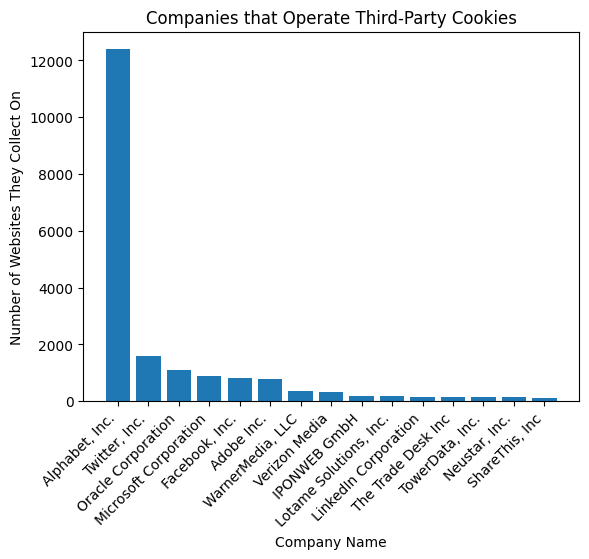

In [333]:
# COOKIES ANALYSIS


list_of_companies = thing.loc[thing["expandableList"].str.len() > 4 ]

my_dict = {}
for x in list_of_companies["expandableList"]:
     for y in ast.literal_eval(x)[0]:
            my_dict[y] = my_dict.get(y, 0) + 1 

output = {k:my_dict[k] for k in sorted(my_dict,key=my_dict.get, reverse=True)}
# print(output)

print("The number of websites collecting data is: " + str(len(output)) + "\n")
print("The median number of websites in the sample that a company collects data on is : " + str(list(my_dict.values())[len(output) // 2]) + "\n")

names = list(output.keys())[0:15]
values = list(output.values())[0:15]

plt.title("Companies that Operate Third-Party Cookies")
plt.xlabel("Company Name")
plt.ylabel("Number of Websites They Collect On")
plt.bar(range(15), values, tick_label=names)
plt.xticks(rotation = 45, ha='right')
plt.show()

In [329]:
# Tiktok/ByteDance Analysis 
searchable_list = thing.loc[thing["expandableList"].str.len() > 4 ]

dict2 = {}
company_list_targets = []
for x in list_of_companies["expandableList"]:
    for y in ast.literal_eval(x)[0]:
        if y == "ByteDance Ltd.":
            company_list_targets.append(x)
            
final_df = thing.loc[thing["expandableList"].isin(company_list_targets)]
print("I found this many websites to be sending cookies to ByteDance: " + str(len(final_df.url.values)) + "\n ")
print("The list of websites sending information is below: " + str(final_df.url.values) + "\n")



I found this many websites to be sending cookies to ByteDance: 17
 
The list of websites sending information is below: ['http://healthcare.oregon.gov' 'http://gocalif.ca.gov'
 'http://staysafe.mn.gov' 'http://cdhs.colorado.gov'
 'http://nystateofhealth.ny.gov' 'http://covidguidance.nh.gov'
 'http://covidvaccine.mo.gov' 'http://dcs.az.gov'
 'http://recruitment.chp.ca.gov' 'http://bha.colorado.gov'
 'http://visionzero.nd.gov' 'http://wyomingofficeoftourism.gov'
 'http://fairs.rsco2.ct.gov' 'http://becomeateacher.virginia.gov'
 'http://central70.codot.gov' 'http://endsextrafficking.az.gov'
 'http://oregonhealthcare.gov']



In [330]:
# TikTok Companies basic analysis

tiktok_only = thing.loc[thing["url"].isin(final_df.url.values)]

# Ad Tracker
print("\n Ad Tracker")
max_length = 17
trackers = tiktok_only.loc[tiktok_only['cardType'] == "ddg_join_ads"]
true_trackers = trackers.loc[trackers["testEventsFound"]==True]
amount = len(true_trackers)
amount_average = true_trackers["bigNumber"].mean()

print("Max Length: " + str(max_length))
print("Amount : " + str(amount))
print("Percent Amount : " + str(amount / max_length))
print("Average Amount : " + str(amount_average))

# COOKIES 
print("\n Cookies")
max_length = 17
cookies = tiktok_only.loc[tiktok_only['cardType'] == "cookies"]
true_cookies = cookies.loc[cookies["testEventsFound"]==True]
amount = len(true_cookies)
amount_average = true_cookies["bigNumber"].mean()


print("Max Length: " + str(max_length))
print("Amount : " + str(amount))
print("Percent Amount : " + str(amount / max_length))
print("Average Amount : " + str(amount_average))

# canvas fingerpritning
print("\n Canvas Fingerprinters")
max_length = 17
canvas = tiktok_only.loc[tiktok_only['cardType'] == "canvas_fingerprinters"]
true_canvas = canvas.loc[canvas["testEventsFound"]==True]
amount = len(true_canvas)
amount_average = true_canvas["bigNumber"].mean()

print("Max Length: " + str(max_length))
print("Amount : " + str(amount))
print("Percent Amount : " + str(amount / max_length))
print("Average Amount : " + str(amount_average))


# Session Recordings


print("\n Session Recording")
max_length = 17
recording = tiktok_only.loc[tiktok_only['cardType'] == "session_recorders"]
true_recording = recording.loc[recording["testEventsFound"]==True]
amount = len(true_recording)
amount_average = true_recording["bigNumber"].mean()

print("Max Length: " + str(max_length))
print("Amount : " + str(amount))
print("Percent Amount : " + str(amount / max_length))
print("Average Amount : " + str(amount_average))

# Key loggers:
print("\n Key Loggers")
max_length = 17
loggers = tiktok_only.loc[tiktok_only['cardType'] == "key_logging"]
true_loggers = loggers.loc[loggers["testEventsFound"]==True]
amount = len(true_loggers)
amount_average = true_loggers["bigNumber"].mean()

print("Max Length: " + str(max_length))
print("Amount : " + str(amount))
print("Percent Amount : " + str(amount / max_length))
print("Average Amount : " + str(amount_average))

# facebook
print("\n FB pixels")
max_length = 17
fb = tiktok_only.loc[tiktok_only['cardType'] == "fb_pixel_events"]
true_fb = fb.loc[fb["testEventsFound"]==True]
amount = len(true_fb)
amount_average = true_fb["bigNumber"].mean()

print("Max Length: " + str(max_length))
print("Amount : " + str(amount))
print("Percent Amount : " + str(amount / max_length))
print("Average Amount : " + str(amount_average))


# google analytics

print("\n Google Analytics")
max_length = 17
ga = tiktok_only.loc[tiktok_only['cardType'] == "ga"]
true_ga = ga.loc[ga["testEventsFound"]==True]
amount = len(true_ga)
amount_average = true_ga["bigNumber"].mean()

print("Max Length: " + str(max_length))
print("Amount : " + str(amount))
print("Percent Amount : " + str(amount / max_length))
print("Average Amount : " + str(amount_average))




 Ad Tracker
Max Length: 17
Amount : 17
Percent Amount : 1.0
Average Amount : 11.235294117647058

 Cookies
Max Length: 17
Amount : 17
Percent Amount : 1.0
Average Amount : 22.41176470588235

 Canvas Fingerprinters
Max Length: 17
Amount : 1
Percent Amount : 0.058823529411764705
Average Amount : nan

 Session Recording
Max Length: 17
Amount : 4
Percent Amount : 0.23529411764705882
Average Amount : nan

 Key Loggers
Max Length: 17
Amount : 0
Percent Amount : 0.0
Average Amount : nan

 FB pixels
Max Length: 17
Amount : 14
Percent Amount : 0.8235294117647058
Average Amount : nan

 Google Analytics
Max Length: 17
Amount : 12
Percent Amount : 0.7058823529411765
Average Amount : nan


In [334]:
# Rudimentary statistics:

# Ad Tracker
print("\n Ad Tracker")
max_length = len(result)
trackers = thing.loc[thing['cardType'] == "ddg_join_ads"]
true_trackers = trackers.loc[trackers["testEventsFound"]==True]
amount = len(true_trackers)
amount_average = true_trackers["bigNumber"].mean()

print("Max Length: " + str(max_length))
print("Amount : " + str(amount))
print("Percent Amount : " + str(amount / max_length))
print("Average Amount : " + str(amount_average))

# COOKIES 
print("\n Cookies")
max_length = len(result)
cookies = thing.loc[thing['cardType'] == "cookies"]
true_cookies = cookies.loc[cookies["testEventsFound"]==True]
amount = len(true_cookies)
amount_average = true_cookies["bigNumber"].mean()


print("Max Length: " + str(max_length))
print("Amount : " + str(amount))
print("Percent Amount : " + str(amount / max_length))
print("Average Amount : " + str(amount_average))

# canvas fingerpritning
print("\n Canvas Fingerprinters")
max_length = len(result)
canvas = thing.loc[thing['cardType'] == "canvas_fingerprinters"]
true_canvas = canvas.loc[canvas["testEventsFound"]==True]
amount = len(true_canvas)
amount_average = true_canvas["bigNumber"].mean()

print("Max Length: " + str(max_length))
print("Amount : " + str(amount))
print("Percent Amount : " + str(amount / max_length))
print("Average Amount : " + str(amount_average))


# Session Recordings


print("\n Session Recording")
max_length = len(result)
recording = thing.loc[thing['cardType'] == "session_recorders"]
true_recording = recording.loc[recording["testEventsFound"]==True]
amount = len(true_recording)
amount_average = true_recording["bigNumber"].mean()

print("Max Length: " + str(max_length))
print("Amount : " + str(amount))
print("Percent Amount : " + str(amount / max_length))
print("Average Amount : " + str(amount_average))

# Key loggers:
print("\n Key Loggers")
max_length = len(result)
loggers = thing.loc[thing['cardType'] == "key_logging"]
true_loggers = loggers.loc[loggers["testEventsFound"]==True]
amount = len(true_loggers)
amount_average = true_loggers["bigNumber"].mean()

print("Max Length: " + str(max_length))
print("Amount : " + str(amount))
print("Percent Amount : " + str(amount / max_length))
print("Average Amount : " + str(amount_average))

# facebook
print("\n FB pixels")
max_length = len(result)
fb = thing.loc[thing['cardType'] == "fb_pixel_events"]
true_fb = fb.loc[fb["testEventsFound"]==True]
amount = len(true_fb)
amount_average = true_fb["bigNumber"].mean()

print("Max Length: " + str(max_length))
print("Amount : " + str(amount))
print("Percent Amount : " + str(amount / max_length))
print("Average Amount : " + str(amount_average))


# google analytics

print("\n Google Analytics")
max_length = len(result)
ga = thing.loc[thing['cardType'] == "ga"]
true_ga = ga.loc[ga["testEventsFound"]==True]
amount = len(true_ga)
amount_average = true_ga["bigNumber"].mean()

print("Max Length: " + str(max_length))
print("Amount : " + str(amount))
print("Percent Amount : " + str(amount / max_length))
print("Average Amount : " + str(amount_average))




 Ad Tracker
Max Length: 21241
Amount : 13080
Percent Amount : 0.6157902170330963
Average Amount : 2.061238532110092

 Cookies
Max Length: 21241
Amount : 6170
Percent Amount : 0.2904759662916059
Average Amount : 3.3429497568881685

 Canvas Fingerprinters
Max Length: 21241
Amount : 502
Percent Amount : 0.02363353891059743
Average Amount : nan

 Session Recording
Max Length: 21241
Amount : 472
Percent Amount : 0.022221176027494
Average Amount : nan

 Key Loggers
Max Length: 21241
Amount : 491
Percent Amount : 0.02311567252012617
Average Amount : nan

 FB pixels
Max Length: 21241
Amount : 683
Percent Amount : 0.032154794971988136
Average Amount : nan

 Google Analytics
Max Length: 21241
Amount : 5390
Percent Amount : 0.25375453133091663
Average Amount : nan


Text(0, 0.5, 'Frequency')

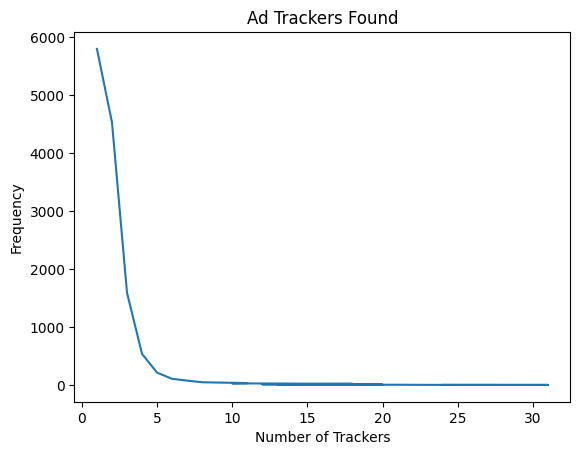

In [335]:
# Graph of Number of Ad Trackers 

true_trackers["bigNumber"].value_counts().plot()
plt.title('Ad Trackers Found')
plt.xlabel('Number of Trackers')
plt.ylabel('Frequency')

(0.0, 75.0)

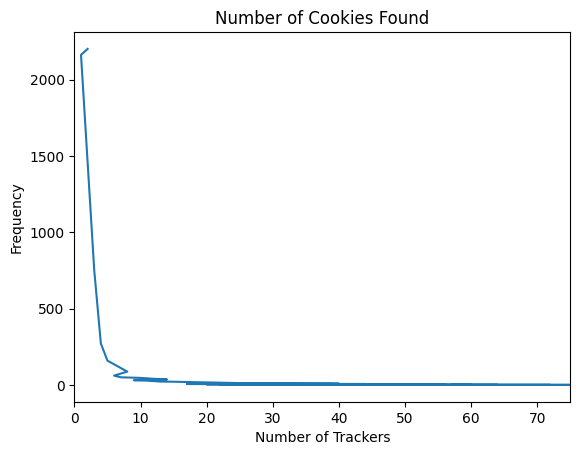

In [336]:
# Graph of Number of Cookies 

true_cookies["bigNumber"].value_counts().plot()
plt.title('Number of Cookies Found')
plt.xlabel('Number of Trackers')
plt.ylabel('Frequency')
plt.xlim(0, 75)


Text(0.5, 0, 'Frequency')

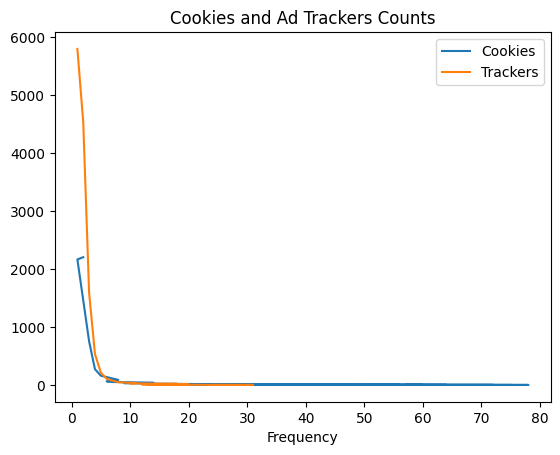

In [337]:
fig, ax = plt.subplots()
true_cookies["bigNumber"].value_counts().plot(ax=ax, label='Cookies')
true_trackers["bigNumber"].value_counts().plot(ax=ax, label = "Trackers")

plt.title("Cookies and Ad Trackers Counts")
plt.legend(loc='upper right')
plt.xlabel("Website #")
plt.xlabel("Frequency")

Text(0, 0.5, 'Frequency')

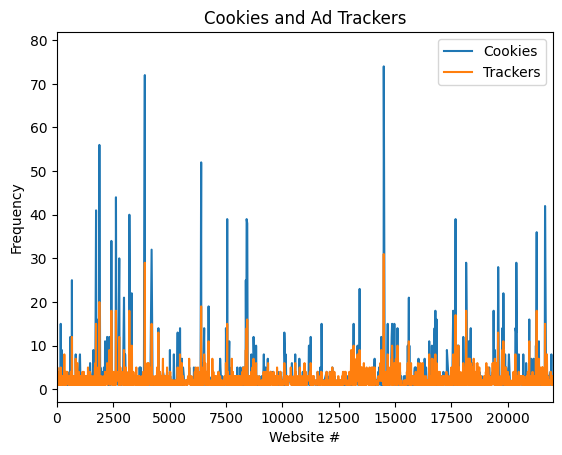

In [338]:
# Combined Graph of Cookies and Ad Trackers
fig, ax = plt.subplots()
true_cookies["bigNumber"].plot(ax=ax, label='Cookies')
true_trackers["bigNumber"].plot(ax=ax, label = "Trackers")

plt.title("Cookies and Ad Trackers")
plt.legend(loc='upper right')
plt.xlim(0,22000)
plt.xlabel("Website #")
plt.ylabel("Frequency")


In [352]:
# Relationship between GA and FB 

fb = thing.loc[thing['cardType'] == "fb_pixel_events"]
true_fb = fb.loc[fb["testEventsFound"]==True]
print("Number of websites with facebook tracking is: " + str(len(true_fb)))



thing2 = thing.loc[thing["url"].isin(true_fb.url.values)]
ga = thing2.loc[thing2['cardType'] == "ga"]
true_ga = ga.loc[ga["testEventsFound"]==True]
print("The number of websites using both is : " + str(len(true_ga)))

print("This means, that given that a website uses Facebook tracking, the probability it also uses Google Analytics tracking is: " + str(len(true_ga)/len(true_fb)))

Number of websites with facebook tracking is: 683
The number of websites using both is : 381
This means, that given that a website uses Facebook tracking, the probability it also uses Google Analytics tracking is: 0.5578330893118595


In [367]:
# relationship between ad tracking and GA 
trackers = thing.loc[thing['cardType'] == "ddg_join_ads"]
true_trackers = trackers.loc[trackers["testEventsFound"]==True]
print("Number of websites with ad tracking is: " + str(len(true_trackers)))


thing2 = thing.loc[thing["url"].isin(true_trackers.url.values)]
cookies = thing2.loc[thing2['cardType'] == "cookies"]
both_ad_cookies = cookies.loc[cookies["testEventsFound"]==True]
print("The number of websites using also cookies is : " + str(len(both_ad_cookies)))

Number of websites with ad tracking is: 13080
The number of websites using also cookies is : 5462


Below is the slope and intercept of the line of best fit between cookies and ads
[0.34595408 1.5788099 ]
Below is the correlation between two the two variables
          cookies       ads
cookies  1.000000  0.827494
ads      0.827494  1.000000


Text(0.5, 1.0, 'Relationship Between Number of Cookies and Ads')

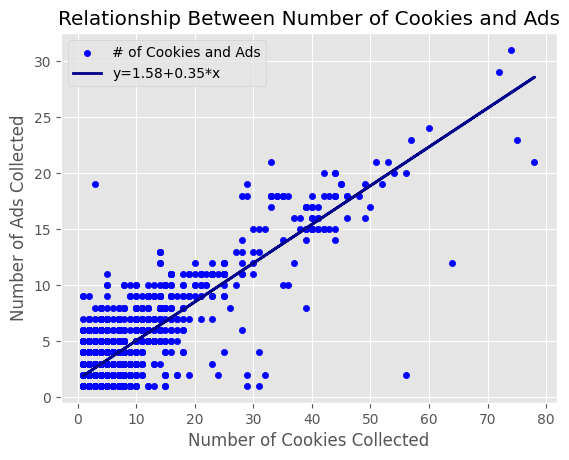

In [389]:
# We can then plot the number of values for these. 
plt.style.use('ggplot')

thing3 = thing.loc[thing["url"].isin(both_ad_cookies.url.values)]
cookies = thing3.loc[thing3['cardType'] == "cookies"]
cookies_part = cookies.loc[cookies["testEventsFound"]==True]
# print(cookies_part.bigNumber)
ads = thing3.loc[thing2['cardType'] == "ddg_join_ads"]
ads_part = ads.loc[ads["testEventsFound"]==True]
# print(ads_part.bigNumber)

data = {"cookies": cookies_part.bigNumber.values, "ads": ads_part.bigNumber.values}
both_df = pd.DataFrame(data)

male_fit = np.polyfit(both_df.cookies, both_df.ads, 1)
print("Below is the slope and intercept of the line of best fit between cookies and ads")
print(male_fit)

print("Below is the correlation between two the two variables")
print(both_df.corr())


# legend, title and labels.

ax1 = both_df.plot(kind='scatter', x='cookies', y='ads', color='blue', label = "# of Cookies and Ads")
ax1.plot(both_df.cookies, male_fit[0] * both_df.cookies + male_fit[1], color='darkblue', linewidth=2, label = 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]))
plt.legend()
plt.xlabel("Number of Cookies Collected")
plt.ylabel("Number of Ads Collected")
plt.title("Relationship Between Number of Cookies and Ads")
